The dispersions are 0.49, 0.08, and 0.15 respectively.
Fundamental plane dispersion is 0.19.

I'm sure I was supposed to find a smaller dispersion for the plane. 
Maybe I'm calculating the dispersion statistic wrong, because it 
still seems to be a tighter correlation visually.


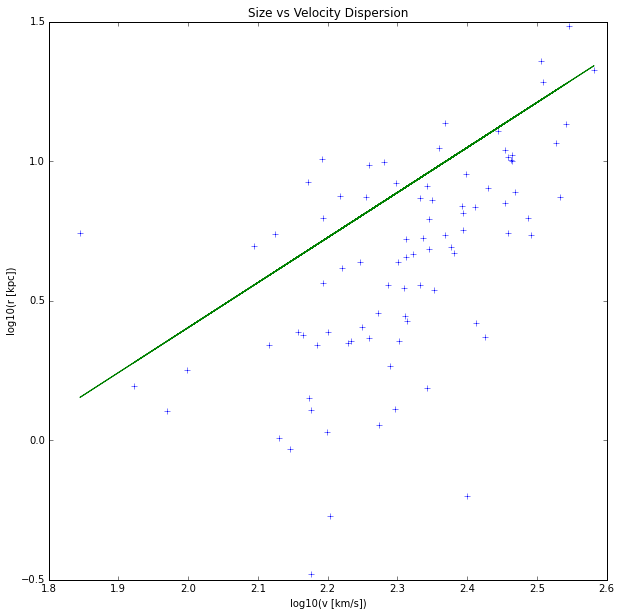

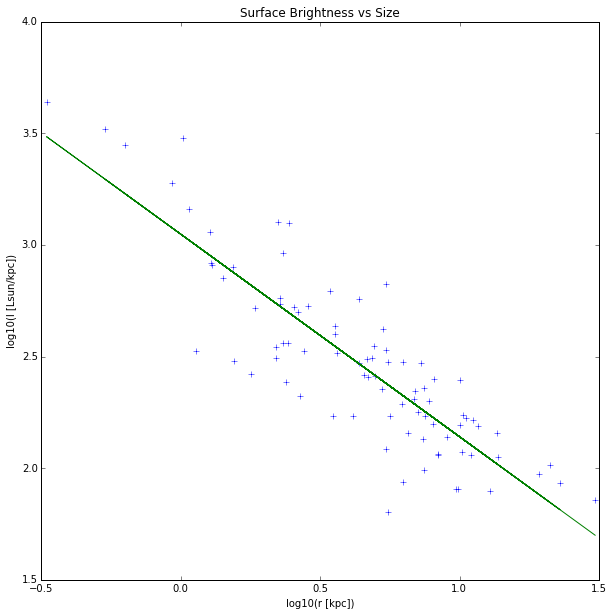

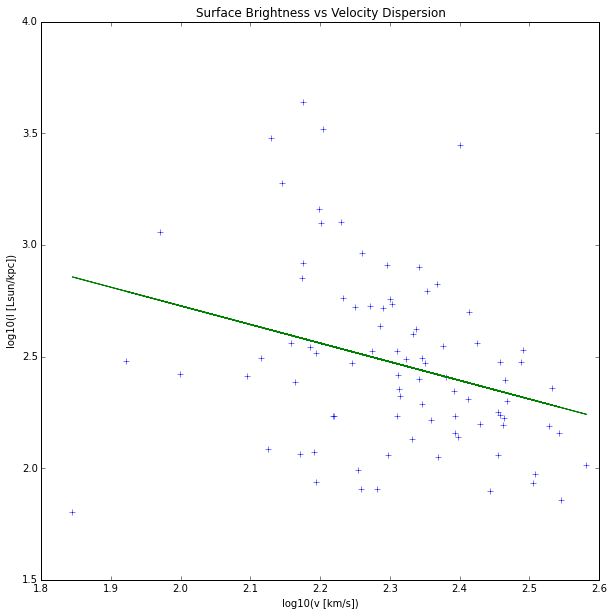

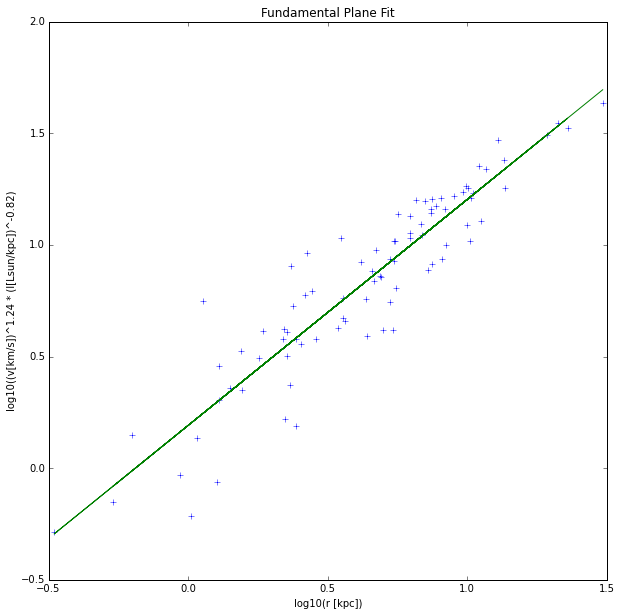

In [1]:
"""
         1         2         3         4         5         6         7      
1234567890123456789012345678901234567890123456789012345678901234567890123456

Cordell Newmiller
Prof. Lubin
PHY 267
Homework 5
Problem 2
Parts (a) and (b)
"""

import numpy
from matplotlib import pyplot

import CJN_Functions as my
# These are functions I wrote in PHY 266, specifically one for fitting

%matplotlib inline


# import fields
# 0   ngc    catalog number
# 1   re     effective radius (kpc)
# 2   σ      velocity dispersion (km/s)
# 3   I      mean surface brightness (L⊙/kpc)

# Typo in problem set? Units of surface brightness should be in 
# luminosity per area, shouldn't they? 

data = numpy.genfromtxt('FP.dat')

ngc = data[:,0]
radius = data[:,1]
velocitydispersion = data[:,2]
surfacebrightness = data[:,3]


# Part (a)
# r vs σ
# I vs r
# I vs σ

logre = numpy.log10(radius)
logvd = numpy.log10(velocitydispersion)
logI  = numpy.log10(surfacebrightness)

# assuming r and σ have constant precision
reerr = 1/(radius * numpy.log(10))
vderr = 1/(velocitydispersion * numpy.log(10))

# assuming constant precision in magnitude
Ierr = numpy.ones(surfacebrightness.size)

firstfit = my.PolynomialFit(logvd,logre,reerr)[0]
secondfit = my.PolynomialFit(logre,logI,Ierr)[0]
thirdfit = my.PolynomialFit(logvd,logI,Ierr)[0]

firstdisp = (numpy.var(logre-firstfit))**(1/2) / numpy.mean(logre)
seconddisp = (numpy.var(logI-secondfit))**(1/2) / numpy.mean(logI)
thirddisp = (numpy.var(logI-thirdfit))**(1/2) / numpy.mean(logI)


figure1 = pyplot.figure(figsize=(10,10));
pyplot.plot(logvd,logre,'+')
pyplot.plot(logvd,firstfit)
pyplot.title('Size vs Velocity Dispersion')
pyplot.xlabel('log10(v [km/s])')
pyplot.ylabel('log10(r [kpc])')

figure2 = pyplot.figure(figsize=(10,10));
pyplot.plot(logre,logI,'+')
pyplot.plot(logre,secondfit)
pyplot.title('Surface Brightness vs Size')
pyplot.ylabel('log10(I [Lsun/kpc])')
pyplot.xlabel('log10(r [kpc])')

figure3 = pyplot.figure(figsize=(10,10));
pyplot.plot(logvd,logI,'+')
pyplot.plot(logvd,thirdfit)
pyplot.title('Surface Brightness vs Velocity Dispersion')
pyplot.xlabel('log10(v [km/s])')
pyplot.ylabel('log10(I [Lsun/kpc])')

# Using the coefficient of variation as the indicator of dispersion
print('The dispersions are %2.2f, %2.2f, and %2.2f respectively.' 
      % (firstdisp,seconddisp,thirddisp))


# Part (b)

vpow = 1.24
Ipow = -0.82

plane = numpy.log10(velocitydispersion**vpow * 
                    surfacebrightness**Ipow)

# assuming constant precision in velocity and magnitude
planeerr = ((vpow /(numpy.log(10) * velocitydispersion))**2 + 
            ((2/5)* Ipow)**2)**(1/2) 

planefit = my.PolynomialFit(logre,plane,planeerr)[0]

planedisp = (numpy.var(plane-planefit))**(1/2) / numpy.mean(plane)

print('Fundamental plane dispersion is %2.2f.' % (planedisp))
print('\nI\'m sure I was supposed to find a smaller dispersion for the plane.',
     '\nMaybe I\'m calculating the dispersion statistic wrong, because it',
     '\nstill seems to be a tighter correlation visually.')

figure4 = pyplot.figure(figsize=(10,10));
pyplot.plot(logre,plane,'+')
pyplot.plot(logre,planefit)
pyplot.title('Fundamental Plane Fit')
pyplot.xlabel('log10(r [kpc])')
pyplot.ylabel('log10((v[km/s])^1.24 * (I[Lsun/kpc])^-0.82)')


# End of problem 2's computational portion